These exercises are part of the practice in Chaperter 4 "Working with data sources", of online courses "Become a data scientist" [www.dataquest.io](www.dataquest.io) <br>
### * sqlite is good for single access, not multiple access with security restrictions. ###
### * sqlite is good for embeded applicaitons such as Android and iOS. ###
### * For full multiple users access, either PostgreSQL, or MySQL can be used. Inside python environment, all operations need to go through the connect via cursor.execute, similar to sqlite ###
##### * <i> Between conn.execute(q).fetchall() and pd.read_sql_query(q, conn), the printout by pandas seems easier to read with column names included.</i> ####
##### * <i> pd.read_sql_query(q,conn) can only execute one statement at a time.</i> ####
# <i> sqlite operations:</i> #
#### * INNER JOIN, LEFT JOIN, recursive JOIN, (No outer join, no right join); ####
#### - GROUP BY, ORDER BY, COUNT(DISTINCT *), SORT ####
#### * Concatenate and Match operations ####
#### * case operation ####
#### * with clause for subquery; multiple named subquery using WITH; ####
#### * permanent defined subquery with VIEW; ####
#### * Union, Intercept, Except ####
#### * Use context manager ####
# <i> sqlite3 command line shell operation </i>

In [80]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

# Use pandas to read contents of database and table

In [5]:
conn0 = sqlite3.connect('../../../dataquest/datafile/4-1-1-jobs.db')
q = "SELECT * FROM sqlite_master WHERE type='table';"
data0 = pd.read_sql_query(q, conn0)
data0.head()

,type,name,tbl_name,rootpage,sql
0,table,recent_grads,recent_grads,2,"CREATE TABLE ""recent_grads"" (\n""index"" INTEGER..."


In [10]:
q = 'SELECT * FROM recent_grads;'
pd_results = pd.read_sql_query(q, conn0)
print(pd_results.shape)
pd_results.head()

(173, 22)


,index,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


# Query using connect execute, with or without cursor

In [16]:
# with cursor
cursor = conn0.cursor()
q = 'SELECT * from recent_grads;'
cursor.execute(q)
results = cursor.fetchall()
q2 = 'SELECT major FROM recent_grads;'
cursor.execute(q2)
majors = cursor.fetchall()
print(type(results))

<class 'list'>


In [17]:
print(len(results))
print(results[0:3])
print(majors[0:3])

173
[(0, 1, 2419, 'PETROLEUM ENGINEERING', 'Engineering', 2339, 36, 2057, 282, 0.120564344, 1976, 1849, 270, 1207, 37, 0.018380527, 110000, 95000, 125000, 1534, 364, 193), (1, 2, 2416, 'MINING AND MINERAL ENGINEERING', 'Engineering', 756, 7, 679, 77, 0.10185185199999999, 640, 556, 170, 388, 85, 0.117241379, 75000, 55000, 90000, 350, 257, 50), (2, 3, 2415, 'METALLURGICAL ENGINEERING', 'Engineering', 856, 3, 725, 131, 0.153037383, 648, 558, 133, 340, 16, 0.024096386, 73000, 50000, 105000, 456, 176, 0)]
[('PETROLEUM ENGINEERING',), ('MINING AND MINERAL ENGINEERING',), ('METALLURGICAL ENGINEERING',)]


In [19]:
q2 = 'SELECT major, Major_category FROM recent_grads;'
cursor.execute(q2)
first = cursor.fetchone()
second = cursor.fetchone()
next_five = cursor.fetchmany(5)
print(first)
print(second)
print(next_five)

('PETROLEUM ENGINEERING', 'Engineering')
('MINING AND MINERAL ENGINEERING', 'Engineering')
[('METALLURGICAL ENGINEERING', 'Engineering'), ('NAVAL ARCHITECTURE AND MARINE ENGINEERING', 'Engineering'), ('CHEMICAL ENGINEERING', 'Engineering'), ('NUCLEAR ENGINEERING', 'Engineering'), ('ACTUARIAL SCIENCE', 'Business')]


In [20]:
# without cursor. All showing SQL commands are not case sensitive, but better using upper-case for clarity
q = "select Major from recent_grads order by Major desc;"
reverse_alpha = conn0.execute(q).fetchall()
print(len(reverse_alpha))
print(reverse_alpha[0:3])

173
[('ZOOLOGY',), ('VISUAL AND PERFORMING ARTS',), ('UNITED STATES HISTORY',)]


# Close the connection after query db

In [21]:
conn0.close()

# Database with more than one tables

In [2]:
conn = sqlite3.connect("../../../dataquest/datafile/factbook.db")

In [23]:
q = "SELECT * FROM sqlite_master WHERE type='table';"
data = pd.read_sql_query(q, conn)
data.head()

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [25]:
q = 'SELECT * FROM facts LIMIT 5;'
pdfacts5 = pd.read_sql_query(q, conn)
print(pdfacts5)

   id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  \
0               2.32       38.57       13.89            1.51   
1               0.30       12.92        6.58            3.30   
2               1.84       23.67        4.31            0.92   
3               0.12        8.13        6.96            0.00   
4               2.78       38.78       11.49            0.46   

                   created_at                  updated_at  
0  2015-11-01 13:19:49.461734  2015-11-01 13:19:49.461734  
1  2015-11-01 13:19:54.431082  2015-11-01 13:19:54.431082  
2  2015-

In [29]:
# also showing SQL case insensitive:
q = '''select min(population), max(population), min(population_growth), 
  max(population_growth) from facts;'''
pd.read_sql_query(q, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [33]:
q = '''select * from facts 
    where (population == (select min(population) from facts)) or  
    (population == (select max(population) from facts));'''
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000.0,None,0,NaN,NaN,NaN,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746
1,261,xx,World,None,NaN,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


Axes(0.125,0.125;0.775x0.755)


C:\Users\huang\Anaconda3\envs\tfdeeplearning\lib\site-packages\IPython\core\interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


Axes(0.125,0.125;0.775x0.755)


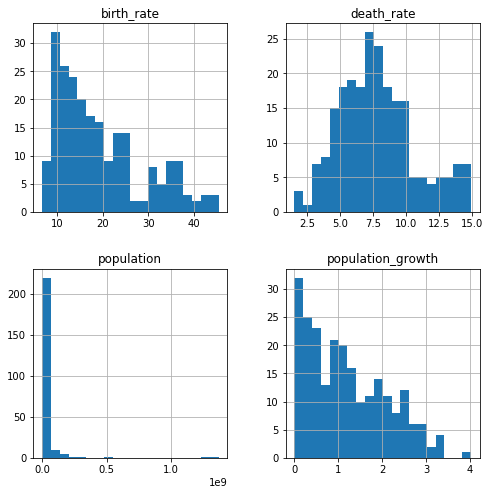

In [6]:
q = '''select population, population_growth, birth_rate, death_rate 
    from facts
    where population !=(select min(population) from facts)
    AND population != (select max(population) from facts);'''

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
print(ax)
pd.read_sql_query(q, conn).hist(ax=ax, bins=20);
print(ax)

** The above plotting of 4 figures with add_plot(111) is probably a feature of seaborn, just a guess **

In [9]:
conn.close()

## Some SQL operations

In [11]:
conn = sqlite3.connect("../../../dataquest/datafile/4-2-1-factbook.db")
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
2,table,cities,cities,2,CREATE TABLE cities (\n id integer prim...


** Check what's in the table of 'cities', and its size: **

In [12]:
pd.read_sql_query('select * from cities limit 5;', conn)

,id,name,population,capital,facts_id
0,1,Oranjestad,37000,1,216
1,2,Saint John'S,27000,1,6
2,3,Abu Dhabi,942000,1,184
3,4,Dubai,1978000,0,184
4,5,Sharjah,983000,0,184


In [13]:
conn.execute('select count(*) from cities;').fetchall()

[(397,)]

In [14]:
q = '''select * from facts inner Join cities 
    ON facts.id = cities.facts_id limit 10;'''
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,id,name,population,capital,facts_id
0,216,aa,Aruba,180,180,0,112162,1.33,12.56,8.18,8.92,1,Oranjestad,37000,1,216
1,6,ac,Antigua and Barbuda,442,442,0,92436,1.24,15.85,5.69,2.21,2,Saint John'S,27000,1,6
2,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,3,Abu Dhabi,942000,1,184
3,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,4,Dubai,1978000,0,184
4,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,5,Sharjah,983000,0,184
5,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,6,Kabul,3097000,1,1
6,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,7,Algiers,2916000,1,3
7,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,8,Oran,783000,0,3
8,11,aj,Azerbaijan,86600,82629,3971,9780780,0.96,16.64,7.07,0.00,9,Baku,2123000,1,11
9,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,10,Tirana,419000,1,2


In [15]:
q = '''select c.*, f.name country_name
    from cities c INNER JOIN facts f
    on c.facts_id = f.id;'''
pd.read_sql_query(q, conn)

,id,name,population,capital,facts_id,country_name
0,1,Oranjestad,37000,1,216,Aruba
1,2,Saint John'S,27000,1,6,Antigua and Barbuda
2,3,Abu Dhabi,942000,1,184,United Arab Emirates
3,4,Dubai,1978000,0,184,United Arab Emirates
4,5,Sharjah,983000,0,184,United Arab Emirates
5,6,Kabul,3097000,1,1,Afghanistan
6,7,Algiers,2916000,1,3,Algeria
7,8,Oran,783000,0,3,Algeria
8,9,Baku,2123000,1,11,Azerbaijan
9,10,Tirana,419000,1,2,Albania


### Find the capital cities 

In [17]:
q = '''SELECT f.name country, c.name capital_city
    FROM cities c INNER JOIN facts f
    on c.facts_id = f.id
    WHERE c.capital == 1;'''    # "c.capital=1" also works
pd.read_sql_query(q, conn)

,country,capital_city
0,Aruba,Oranjestad
1,Antigua and Barbuda,Saint John'S
2,United Arab Emirates,Abu Dhabi
3,Afghanistan,Kabul
4,Algeria,Algiers
5,Azerbaijan,Baku
6,Albania,Tirana
7,Armenia,Yerevan
8,Andorra,Andorra La Vella
9,Angola,Luanda


### find imcomplete data from 'cities' table

In [22]:
q = '''select count(DISTINCT(name)) from facts;'''
print(conn.execute(q).fetchall())
q = '''select count(DISTINCT(facts_id)) from cities;'''
print(conn.execute(q).fetchall())

[(261,)]
[(210,)]


* So there are 51 countries that have no entries in cities table. Let's find them out

In [18]:
q = '''SELECT f.name country, f.population 
    from facts f LEFT JOIN cities c
    on f.id = c.facts_id
    WHERE c.name IS NULL;'''
pd.read_sql_query(q, conn)

,country,population
0,Kosovo,1.870981e+06
1,Monaco,3.053500e+04
2,Nauru,9.540000e+03
3,San Marino,3.302000e+04
4,Singapore,5.674472e+06
5,Holy See (Vatican City),8.420000e+02
6,Taiwan,2.341513e+07
7,European Union,5.139494e+08
8,Ashmore and Cartier Islands,NaN
9,Christmas Island,1.530000e+03


So, the countries that missing in cities table are: small countries without major urban area; city-states such as Monaco and Singapore, Territories such as Hong Kong; Islands or area has no population; Regions such as EU and World. 

** right join is not available in splite **

** FULL OUTER JOIN is also not available in splite. It can be achieved by union of two LEFT JOIN ** <br>
** (SELECT AB.a, AB.b, CD.c, CD.d from AB LEFT JOIN CD on AB.id=CD.id) UNION ALL (SELECT CD.c, CD.d, AB.a, AB.b from CD LEFT JOIN AB on CD.id=AB.id) **

#### Can use number in ORDER BY and GROUP BY, but may not as clear for reading ####

In [24]:
# query the top 10 most populated capital cities in the world (directly without subquery)
q = '''SELECT c.name capital_city, f.name country, c.population 
    from facts f INNER JOIN cities c on c.facts_id = f.id 
    WHERE c.capital = 1
    ORDER by 3 DESC
    LIMIT 10;'''
conn.execute(q).fetchall()

[('Tokyo', 'Japan', 37217000),
 ('New Delhi', 'India', 22654000),
 ('Mexico City', 'Mexico', 20446000),
 ('Beijing', 'China', 15594000),
 ('Dhaka', 'Bangladesh', 15391000),
 ('Buenos Aires', 'Argentina', 13528000),
 ('Manila', 'Philippines', 11862000),
 ('Moscow', 'Russia', 11621000),
 ('Cairo', 'Egypt', 11169000),
 ('Jakarta', 'Indonesia', 9769000)]

In [29]:
# top 10 most popular cities, with subquery, could reduce search workload.
q = '''SELECT c.name capital_city, f.name country, c.population population 
    from facts f 
    INNER JOIN (SELECT * from cities
            where capital = 1
            AND population > 1000000) c
    ON c.facts_id = f.id
    ORDER BY 3 DESC
    LIMIT 10;'''
pd.read_sql_query(q, conn)

,capital_city,country,population
0,Tokyo,Japan,37217000
1,New Delhi,India,22654000
2,Mexico City,Mexico,20446000
3,Beijing,China,15594000
4,Dhaka,Bangladesh,15391000
5,Buenos Aires,Argentina,13528000
6,Manila,Philippines,11862000
7,Moscow,Russia,11621000
8,Cairo,Egypt,11169000
9,Jakarta,Indonesia,9769000


In [31]:
q = '''SELECT f.name country, c.urban_pop, f.population total_pop, 
    (c.urban_pop / CAST(f.population as FLOAT)) urban_pct
    FROM facts f
    INNER JOIN (SELECT facts_id, SUM(population) urban_pop
                FROM cities
                GROUP BY 1) c ON c.facts_id = f.id
    WHERE urban_pct > .5
    ORDER BY 4 ASC;'''
pct = pd.read_sql_query(q, conn)
pct

,country,urban_pop,total_pop,urban_pct
0,Uruguay,1672000,3341893,0.500315
1,"Congo, Republic of the",2445000,4755097,0.514185
2,Brunei,241000,429646,0.560927
3,New Caledonia,157000,271615,0.578024
4,Virgin Islands,60000,103574,0.579296
5,Falkland Islands (Islas Malvinas),2000,3361,0.595061
6,Djibouti,496000,828324,0.598800
7,Australia,13789000,22751014,0.606083
8,Iceland,206000,331918,0.620635
9,Israel,5226000,8049314,0.649248


** The last 3 "countries" have urban popolations more than total populations. Many foreigners?? **

In [32]:
conn.close()

# Another example with 11 tables #

In [33]:
conn = sqlite3.connect("../../../dataquest/datafile/4-2-2-chinook.db")
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [34]:
schema = pd.read_sql_query('SELECT * FROM sqlite_master WHERE type="table";', conn)['sql']
for each in schema:
    print(each)

CREATE TABLE [album]
(
    [album_id] INTEGER PRIMARY KEY NOT NULL,
    [title] NVARCHAR(160)  NOT NULL,
    [artist_id] INTEGER  NOT NULL,
    FOREIGN KEY ([artist_id]) REFERENCES [artist] ([artist_id]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
CREATE TABLE [artist]
(
    [artist_id] INTEGER PRIMARY KEY NOT NULL,
    [name] NVARCHAR(120)
)
CREATE TABLE [customer]
(
    [customer_id] INTEGER PRIMARY KEY NOT NULL,
    [first_name] NVARCHAR(40)  NOT NULL,
    [last_name] NVARCHAR(20)  NOT NULL,
    [company] NVARCHAR(80),
    [address] NVARCHAR(70),
    [city] NVARCHAR(40),
    [state] NVARCHAR(40),
    [country] NVARCHAR(40),
    [postal_code] NVARCHAR(10),
    [phone] NVARCHAR(24),
    [fax] NVARCHAR(24),
    [email] NVARCHAR(60)  NOT NULL,
    [support_rep_id] INTEGER,
    FOREIGN KEY ([support_rep_id]) REFERENCES [employee] ([employee_id]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
CREATE TABLE [employee]
(
    [employee_id] INTEGER PRIMARY KEY NOT NULL,
    [last_name] NVARCHAR

** Find information among different tables for a specific track_id **

In [35]:
q = '''select il.track_id, t.name track_name, mt.name track_type, il.unit_price, il.quantity 
    from invoice_line il
    INNER JOIN track t on t.track_id = il.track_id
    INNER JOIN media_type mt on mt.media_type_id = t.media_type_id
    WHERE il.invoice_id = 4;'''
conn.execute(q).fetchall()

[(3448,
  'Lamentations of Jeremiah, First Set \\ Incipit Lamentatio',
  'Protected AAC audio file',
  0.99,
  1),
 (2560, 'Violent Pornography', 'MPEG audio file', 0.99, 1),
 (3336, 'War Pigs', 'Purchased AAC audio file', 0.99, 1),
 (829, "Let's Get Rocked", 'MPEG audio file', 0.99, 1),
 (1872, 'Attitude', 'MPEG audio file', 0.99, 1),
 (748, 'Dealer', 'MPEG audio file', 0.99, 1),
 (1778,
  "You're What's Happening (In The World Today)",
  'MPEG audio file',
  0.99,
  1),
 (2514, 'Spoonman', 'MPEG audio file', 0.99, 1)]

In [36]:
pd.read_sql_query(q, conn)

,track_id,track_name,track_type,unit_price,quantity
0,3448,"Lamentations of Jeremiah, First Set \ Incipit ...",Protected AAC audio file,0.99,1
1,2560,Violent Pornography,MPEG audio file,0.99,1
2,3336,War Pigs,Purchased AAC audio file,0.99,1
3,829,Let's Get Rocked,MPEG audio file,0.99,1
4,1872,Attitude,MPEG audio file,0.99,1
5,748,Dealer,MPEG audio file,0.99,1
6,1778,You're What's Happening (In The World Today),MPEG audio file,0.99,1
7,2514,Spoonman,MPEG audio file,0.99,1


In [37]:
q = '''select il.track_id, t.name track_name, ar.name artist_name, mt.name track_type, 
    il.unit_price, il.quantity 
    from invoice_line il
    INNER JOIN track t on t.track_id = il.track_id
    INNER JOIN media_type mt on mt.media_type_id = t.media_type_id
    INNER JOIN album al on al.album_id = t.album_id
    INNER JOIN artist ar on ar.artist_id = al.artist_id
    WHERE il.invoice_id = 4;'''
pd.read_sql_query(q, conn)

,track_id,track_name,artist_name,track_type,unit_price,quantity
0,3448,"Lamentations of Jeremiah, First Set \ Incipit ...",The King's Singers,Protected AAC audio file,0.99,1
1,2560,Violent Pornography,System Of A Down,MPEG audio file,0.99,1
2,3336,War Pigs,Cake,Purchased AAC audio file,0.99,1
3,829,Let's Get Rocked,Def Leppard,MPEG audio file,0.99,1
4,1872,Attitude,Metallica,MPEG audio file,0.99,1
5,748,Dealer,Deep Purple,MPEG audio file,0.99,1
6,1778,You're What's Happening (In The World Today),Marvin Gaye,MPEG audio file,0.99,1
7,2514,Spoonman,Soundgarden,MPEG audio file,0.99,1


In [38]:
q = '''select at.title album, at.artist, SUM(il.quantity) tracks_purchased 
    FROM invoice_line il
    INNER JOIN (select al.title title, t.track_id track_id, a.name artist
        FROM track t INNER JOIN album al
        ON t.album_id = al.album_id
        INNER JOIN artist a 
        on al.artist_id = a.artist_id) at 
    on il.track_id = at.track_id
    GROUP BY at.title
    ORDER BY tracks_purchased DESC
    limit 5;'''
pd.read_sql_query(q, conn)

,album,at.artist,tracks_purchased
0,Are You Experienced?,Jimi Hendrix,187
1,Faceless,Godsmack,96
2,Mezmerize,System Of A Down,93
3,Get Born,JET,90
4,The Doors,The Doors,83


# recursive join -- a table join to itself
# Concatenate and match operations

In [39]:
q = '''SELECT e1.first_name || " " || e1.last_name employee_name,
        e1.title employee_title,
        e2.first_name || " " || e2.last_name supervisor_name, 
        e2.title supervisor_title 
    FROM employee e1 LEFT JOIN employee e2
    ON e1.reports_to = e2.employee_id
    ORDER BY 1;'''
pd.read_sql_query(q, conn)

,employee_name,employee_title,supervisor_name,supervisor_title
0,Andrew Adams,General Manager,None,None
1,Jane Peacock,Sales Support Agent,Nancy Edwards,Sales Manager
2,Laura Callahan,IT Staff,Michael Mitchell,IT Manager
3,Margaret Park,Sales Support Agent,Nancy Edwards,Sales Manager
4,Michael Mitchell,IT Manager,Andrew Adams,General Manager
5,Nancy Edwards,Sales Manager,Andrew Adams,General Manager
6,Robert King,IT Staff,Michael Mitchell,IT Manager
7,Steve Johnson,Sales Support Agent,Nancy Edwards,Sales Manager


In [40]:
q = '''SELECT first_name, last_name, phone 
    FROM customer
    WHERE first_name LIKE "%belle%"; '''
pd.read_sql_query(q, conn)

,first_name,last_name,phone
0,Isabelle,Mercier,+33 03 80 73 66 99


# case operation

In [41]:
q = '''SELECT c.first_name || " " || c.last_name customer_name,
        COUNT(*) number_of_purchases,
        SUM(iv.total) total_spent, 
        CASE
            WHEN SUM(iv.total) < 40 THEN "small spender"
            WHEN SUM(iv.total) > 100 THEN "big spender"
            ELSE "regular"
            END
            AS customer_category
        FROM customer c INNER JOIN invoice iv
        ON c.customer_id = iv.customer_id
        GROUP BY c.customer_id
        ORDER BY 1;'''
pd.read_sql_query(q, conn)

,customer_name,number_of_purchases,total_spent,customer_category
0,Aaron Mitchell,8,70.29,regular
1,Alexandre Rocha,10,69.30,regular
2,Astrid Gruber,9,69.30,regular
3,Bjørn Hansen,9,72.27,regular
4,Camille Bernard,9,79.20,regular
5,Daan Peeters,7,60.39,regular
6,Dan Miller,12,95.04,regular
7,Diego Gutiérrez,5,39.60,small spender
8,Dominique Lefebvre,9,72.27,regular
9,Eduardo Martins,12,60.39,regular


# For clearity of subquery, using with clause

In [44]:
q = '''with playlist_info AS
        (SELECT
                p.playlist_id,
                p.name playlist_name,
                t.name track_name,
                (t.milliseconds /1000) length_seconds
            FROM playlist p
            LEFT JOIN playlist_track pt ON pt.playlist_id = p.playlist_id
            LEFT JOIN track t ON t.track_id = pt.track_id)
        SELECT 
            playlist_id,
            playlist_name,
            COUNT(track_name) number_of_tracks,
            SUM(length_seconds) length_seconds
        FROM playlist_info
        GROUP BY 1,2
        ORDER BY 1;'''
pd.read_sql_query(q, conn)

,playlist_id,playlist_name,number_of_tracks,length_seconds
0,1,Music,3290,876049.0
1,2,Movies,0,NaN
2,3,TV Shows,213,500987.0
3,4,Audiobooks,0,NaN
4,5,90’s Music,1477,397970.0
5,6,Audiobooks,0,NaN
6,7,Movies,0,NaN
7,8,Music,3290,876049.0
8,9,Music Videos,1,294.0
9,10,TV Shows,213,500987.0


# Permanently define subquery: create a table with VIEW
need to drop the table first if want to modify an already created table.<br>
"view" is a type that can be listed by "SELECT * FROM sqlite_master;"

In [49]:
conn.execute('drop VIEW customer_gt_90_dollars') 
q = '''CREATE VIEW customer_gt_90_dollars AS
    SELECT customer.*
    FROM customer INNER JOIN invoice
    ON customer.customer_id = invoice.customer_id
    GROUP BY customer.customer_id
    HAVING SUM(invoice.total) > 90; '''
# It's said that if not for sqlite, or jupyter notebook, VIEW table name shoud be dbname.tablename
conn.execute(q)

In [51]:
pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table';", conn)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [56]:
pd.read_sql_query('SELECT * from customer_gt_90_dollars;', conn).head()

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
2,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
3,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
4,13,Fernanda,Ramos,None,Qe 7 Bloco G,Brasília,DF,Brazil,71020-677,+55 (61) 3363-5547,+55 (61) 3363-7855,fernadaramos4@uol.com.br,4


In [55]:
pd.read_sql_query("SELECT * FROM sqlite_master;", conn)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [57]:
q = '''CREATE VIEW customer_usa AS
        SELECT * FROM customer
        WHERE country = "USA"; '''
conn.execute(q)

# Union, Intersect, Except #
need to have the same columns with compatible types

In [58]:
q = '''WITH customer_usa_gt_90 AS (
        SELECT * FROM customer_usa
        INTERSECT 
        SELECT * FROM customer_gt_90_dollars)
    
    SELECT e.first_name || " " || e.last_name employee_name,
        COUNT(customer_usa_gt_90.customer_id) number_usa_gt_90
        FROM employee e LEFT JOIN customer_usa_gt_90
        ON e.employee_id = customer_usa_gt_90.support_rep_id
        GROUP BY e.employee_id
        HAVING e.title = "Sales Support Agent"
        ORDER BY employee_name;'''
pd.read_sql_query(q, conn)

,employee_name,number_usa_gt_90
0,Jane Peacock,0
1,Margaret Park,2
2,Steve Johnson,2


# Multiple named sebqueries, with 'with'

In [60]:
q = '''WITH 
            customer_india AS (
                SELECT * FROM customer
                WHERE country = "India"),
            sales_per_customer AS (
                SELECT 
                    customer_id,
                    SUM(total) total
                FROM invoice
                GROUP BY 1)
                
        SELECT ci.first_name || " " || ci.last_name customer_name, 
                spc.total total_purchases
            FROM customer_india ci 
            INNER JOIN sales_per_customer spc
            ON ci.customer_id = spc.customer_id
            ORDER BY customer_name; '''
pd.read_sql_query(q, conn)

,customer_name,total_purchases
0,Manoj Pareek,111.87
1,Puja Srivastava,71.28


In [63]:
q = '''WITH 
        usa AS (
            SELECT * FROM customer
            WHERE country = "USA"),
        last_name_g AS (
            SELECT * FROM usa
            WHERE last_name LIKE "G%"),
        state_ca AS (
            SELECT * FROM last_name_g
            WHERE state = "CA" )
            
    SELECT 
        first_name,
        last_name,
        country,
        state
    FROM state_ca;'''
pd.read_sql_query(q, conn)

,first_name,last_name,country,state
0,Tim,Goyer,USA,CA


q = '''WITH 
        customer_country_purchases AS (
            SELECT 
                i.customer_id,
                c.country,
                SUM(i.total) total_purchases
            FROM invoice i
            INNER JOIN customer c 
            ON i.customer_id = c.customer_id
            GROUP BY 1,2),
        
        country_max_purchase AS (
            SELECT 
                country,
                MAX(total_purchases) max_purchase
            FROM customer_country_purchases
            GROUP BY 1),
            
        country_best_customer AS (
            SELECT 
                cmp.country,
                cmp.max_purchase,
                (SELECT ccp.customer_id
                  FROM customer_country_purchases ccp
                  WHERE ccp.country = cmp.country AND 
                      cmp.max_purchase = ccp.total_purchases) customer_id
                FROM country_max_purchase cmp)
                
        SELECT 
            cbc.country country,
            c.first_name || " " || c.last_name customer_name, 
            cbc.max_purchase total_purchased
        FROM customer c
        INNER JOIN country_best_customer cbc
        ON cbc.customer_id = c.customer_id
        ORDER By 1 ASC;'''

pd.read_sql_query(q, conn)

In [67]:
conn.close()

# Use context manager
i.e. use small functions for better handling database opening and closing

In [69]:
def run_query(q):
    with sqlite3.connect('../../../dataquest/datafile/4-2-2-chinook.db') as conn:
        return pd.read_sql_query(q, conn)
    
def run_command(c):
    with sqlite3.connect('../../../dataquest/datafile/4-2-2-chinook.db') as conn:
        conn.isolation_level = None
        conn.execute(c)
        
def show_tables():
    q = '''SELECT name, type 
            FROM sqlite_master
            WHERE type in ("table", "view")'''
    return run_query(q)

In [70]:
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


** The 2 views we made in above practice are saved in the database **

In [72]:
q = '''
WITH sale_in_usa AS (
    SELECT iv.invoice_id
    FROM invoice iv INNER JOIN customer c
    ON iv.customer_id = c.customer_id
    WHERE c.country = "USA"),
    
    track_sale AS (
    SELECT g.name genre, COUNT(*) sale_counts
    FROM sale_in_usa usa INNER JOIN invoice_line il
    ON usa.invoice_id = il.invoice_id
    INNER JOIN track t ON il.track_id = t.track_id
    INNER JOIN genre g ON t.genre_id = g.genre_id
    GROUP BY g.genre_id
    ORDER BY sale_counts DESC)
    
SELECT ts.*,
    CAST(ts.sale_counts as FLOAT)/CAST((SELECT SUM(track_sale.sale_counts)
                                        FROM track_sale) as FLOAT) percent
    FROM track_sale as ts;'''

run_query(q)

,genre,sale_counts,percent
0,Rock,561,0.533777
1,Alternative & Punk,130,0.123692
2,Metal,124,0.117983
3,R&B/Soul,53,0.050428
4,Blues,36,0.034253
5,Alternative,35,0.033302
6,Latin,22,0.020932
7,Pop,22,0.020932
8,Hip Hop/Rap,20,0.019029
9,Jazz,14,0.013321


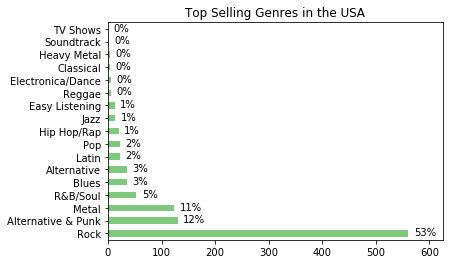

In [75]:
genre_sales_usa = run_query(q)
genre_sales_usa.set_index("genre", inplace=True, drop=True)

genre_sales_usa["sale_counts"].plot.barh(
    title="Top Selling Genres in the USA",
    xlim=(0, 625),
    colormap=plt.cm.Accent
)

plt.ylabel('')

for i, label in enumerate(list(genre_sales_usa.index)):
    score = genre_sales_usa.loc[label, "sale_counts"]
    label = (genre_sales_usa.loc[label, "percent"] * 100
            ).astype(int).astype(str) + "%"
    plt.annotate(str(label), (score + 10, i - 0.15))

plt.show()

In [76]:
employee_sales_performance = '''
WITH customer_support_rep_sales AS
    (
     SELECT
         i.customer_id,
         c.support_rep_id,
         SUM(i.total) total
     FROM invoice i
     INNER JOIN customer c ON i.customer_id = c.customer_id
     GROUP BY 1,2
    )

SELECT
    e.first_name || " " || e.last_name employee,
    e.hire_date,
    SUM(csrs.total) total_sales
FROM customer_support_rep_sales csrs
INNER JOIN employee e ON e.employee_id = csrs.support_rep_id
GROUP BY 1;
'''

run_query(employee_sales_performance)

,employee,hire_date,total_sales
0,Jane Peacock,2017-04-01 00:00:00,1731.51
1,Margaret Park,2017-05-03 00:00:00,1584.00
2,Steve Johnson,2017-10-17 00:00:00,1393.92


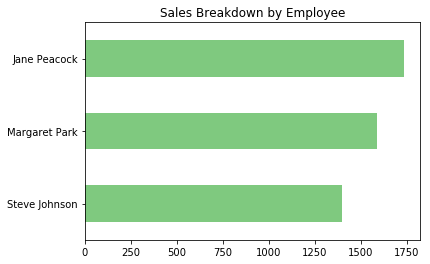

In [77]:
employee_sales = run_query(employee_sales_performance)

employee_sales.set_index("employee", drop=True, inplace=True)
employee_sales.sort_values("total_sales", inplace=True)
employee_sales.plot.barh(
    legend=False,
    title='Sales Breakdown by Employee',
    colormap=plt.cm.Accent
)
plt.ylabel('')
plt.show()

# sort column in query

In [78]:
sales_by_country = '''
WITH country_or_other AS
    (
     SELECT
       CASE
           WHEN (
                 SELECT count(*)
                 FROM customer
                 where country = c.country
                ) = 1 THEN "Other"
           ELSE c.country
       END AS country,
       c.customer_id,
       il.*
     FROM invoice_line il
     INNER JOIN invoice i ON i.invoice_id = il.invoice_id
     INNER JOIN customer c ON c.customer_id = i.customer_id
    )

SELECT
    country,
    customers,
    total_sales,
    average_order,
    customer_lifetime_value
FROM
    (
    SELECT
        country,
        count(distinct customer_id) customers,
        SUM(unit_price) total_sales,
        SUM(unit_price) / count(distinct customer_id) customer_lifetime_value,
        SUM(unit_price) / count(distinct invoice_id) average_order,
        CASE
            WHEN country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM country_or_other
    GROUP BY country
    ORDER BY sort ASC, total_sales DESC
    );
'''

run_query(sales_by_country)

,country,customers,total_sales,average_order,customer_lifetime_value
0,USA,13,1040.49,7.942672,80.037692
1,Canada,8,535.59,7.047237,66.948750
2,Brazil,5,427.68,7.011148,85.536000
3,France,5,389.07,7.781400,77.814000
4,Germany,4,334.62,8.161463,83.655000
5,Czech Republic,2,273.24,9.108000,136.620000
6,United Kingdom,3,245.52,8.768571,81.840000
7,Portugal,2,185.13,6.383793,92.565000
8,India,2,183.15,8.721429,91.575000
9,Other,15,1094.94,7.448571,72.996000


# Visualize the sales by country

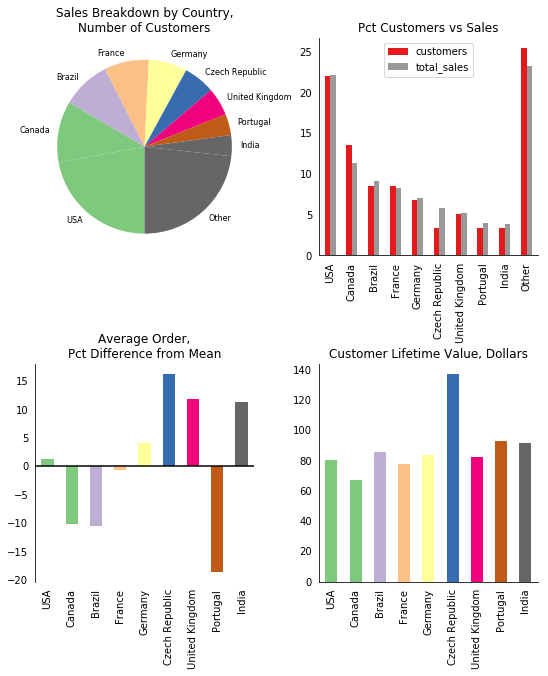

In [84]:
country_metrics = run_query(sales_by_country)
country_metrics.set_index("country", drop=True, inplace=True)
colors = [plt.cm.Accent(i) for i in np.linspace(0, 1, country_metrics.shape[0])]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 10))
ax1, ax2, ax3, ax4 = axes.flatten()    # [<matplotlib.axes._subplots.AxesSubplot object   ...]
fig.subplots_adjust(hspace=.5, wspace=.3)

# top left
sales_breakdown = country_metrics["total_sales"].copy().rename('')
sales_breakdown.plot.pie(
    ax=ax1,
    startangle=-90,
    counterclock=False,
    title='Sales Breakdown by Country,\nNumber of Customers',
    colormap=plt.cm.Accent,
    fontsize=8,
    wedgeprops={'linewidth':0}
    
)

# top right
cvd_cols = ["customers","total_sales"]
custs_vs_dollars = country_metrics[cvd_cols].copy()
custs_vs_dollars.index.name = ''
for c in cvd_cols:
    custs_vs_dollars[c] /= custs_vs_dollars[c].sum() / 100
custs_vs_dollars.plot.bar(
    ax=ax2,
    colormap=plt.cm.Set1,
    title="Pct Customers vs Sales"
)
ax2.tick_params(top="off", right="off", left="off", bottom="off")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)


# bottom left
avg_order = country_metrics["average_order"].copy()
avg_order.index.name = ''
difference_from_avg = avg_order * 100 / avg_order.mean() - 100
difference_from_avg.drop("Other", inplace=True)
difference_from_avg.plot.bar(
    ax=ax3,
    color=colors,
    title="Average Order,\nPct Difference from Mean"
)
ax3.tick_params(top="off", right="off", left="off", bottom="off")
ax3.axhline(0, color='k')
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["bottom"].set_visible(False)

# bottom right
ltv = country_metrics["customer_lifetime_value"].copy()
ltv.index.name = ''
ltv.drop("Other",inplace=True)
ltv.plot.bar(
    ax=ax4,
    color=colors,
    title="Customer Lifetime Value, Dollars"
)
ax4.tick_params(top="off", right="off", left="off", bottom="off")
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)

plt.show()

# Except

TO find whether a purchase is album purchase or track purchasee:
1) Find the a track_id, min(track_id) of an invoice, select the invoice_id and the (one) track_id into "invoice_first_tack"
    verified that for each invoice, there is only one "min(track_id)" selected.
2) Creat a column of "album purchase" with value of "yes/No", with:
    Yes, if: (2.1) tracks in the album where the "invoice_first_track" is - tracks in the invoice where the "invoice_first_track" is = NULL
            AND
            (2.2) all tracks in the invoice of "invoice_first_track" - all track in the albums what is related to the tacks in "invoice_first_track"
    No, Otherwise
3) Group "invoice_first_tack" according to "yes/No" of "album_purchases", and divided by count(*) of invoice
COMMENTS: My following checking, "test" seems telling me that it only works by assuming that each invoice only contains only album if it is album purchase !!

In [87]:
test = ''' 
    SELECT t2.album_id, ifs.invoice_id, ifs.first_track_id
    FROM track t2 
    INNER JOIN (
        SELECT
             il.invoice_id invoice_id,
             MIN(il.track_id) first_track_id
        FROM invoice_line il
        GROUP BY 1) AS ifs
    WHERE t2.track_id = ifs.first_track_id
    '''
run_query(test)

,album_id,invoice_id,first_track_id
0,91,1,1158
1,20,2,201
2,203,3,2516
3,58,4,748
4,163,5,1986
5,5,6,30
6,6,7,42
7,9,8,81
8,20,9,196
9,215,10,2663


In [88]:
# About purchase of album or purchase of tracks
albums_vs_tracks = '''
WITH invoice_first_track AS
    (
     SELECT
         il.invoice_id invoice_id,
         MIN(il.track_id) first_track_id
     FROM invoice_line il
     GROUP BY 1
    )

SELECT
    album_purchase,
    COUNT(invoice_id) number_of_invoices,
    CAST(count(invoice_id) AS FLOAT) / (
                                         SELECT COUNT(*) FROM invoice
                                      ) percent
FROM
    (
    SELECT
        ifs.*,
        CASE
            WHEN
                 (
                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 

                  EXCEPT 

                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id
                 ) IS NULL
             AND
                 (
                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id

                  EXCEPT 

                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 
                 ) IS NULL
             THEN "yes"
             ELSE "no"
         END AS "album_purchase"
     FROM invoice_first_track ifs
    )
GROUP BY album_purchase;
'''

run_query(albums_vs_tracks)

,album_purchase,number_of_invoices,percent
0,no,500,0.814332
1,yes,114,0.185668


# Command line in sqlite3 shell
Could not make command line work within Jupyter notebook.

In [90]:
!dir

 Volume in drive C is OS
 Volume Serial Number is FE0F-1573

 Directory of C:\Users\huang\Documents\dataScience\practice\python\SQL

10/02/2018  11:36 AM    <DIR>          .
10/02/2018  11:36 AM    <DIR>          ..
09/26/2018  04:46 PM    <DIR>          .ipynb_checkpoints
10/02/2018  11:36 AM           357,024 sqlite3_exercise.ipynb
               1 File(s)        357,024 bytes
               3 Dir(s)  827,833,692,160 bytes free


In [ ]:
# Tried this command, it does not work:  !sqlite3 ../../../dataquest/datafile/4-2-2-chinook.db   